<a href="https://colab.research.google.com/github/Yousma789/Yousma789/blob/main/Yousma_Ali_AI_290811.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df=pd.read_csv("combined_data.csv")

In [5]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [6]:
df.tail()

,label,text
30941,1,hellish report is here lescapenumberkup hxpncu...
30942,0,hallo just try it like a data frame as i maile...
30943,0,author obnox date escapenumber escapenumber es...
30944,0,hi i have written an r package http tocsy agnl...
30945,0,to view this mail in a browser copy http sdmes...


In [8]:
df.shape

(30946, 2)

In [10]:
df.size

61892

In [21]:
df.dtypes

,0
label,int64
text,object


In [20]:
null_values = df.isnull().sum()
null_values

,0
label,0
text,0


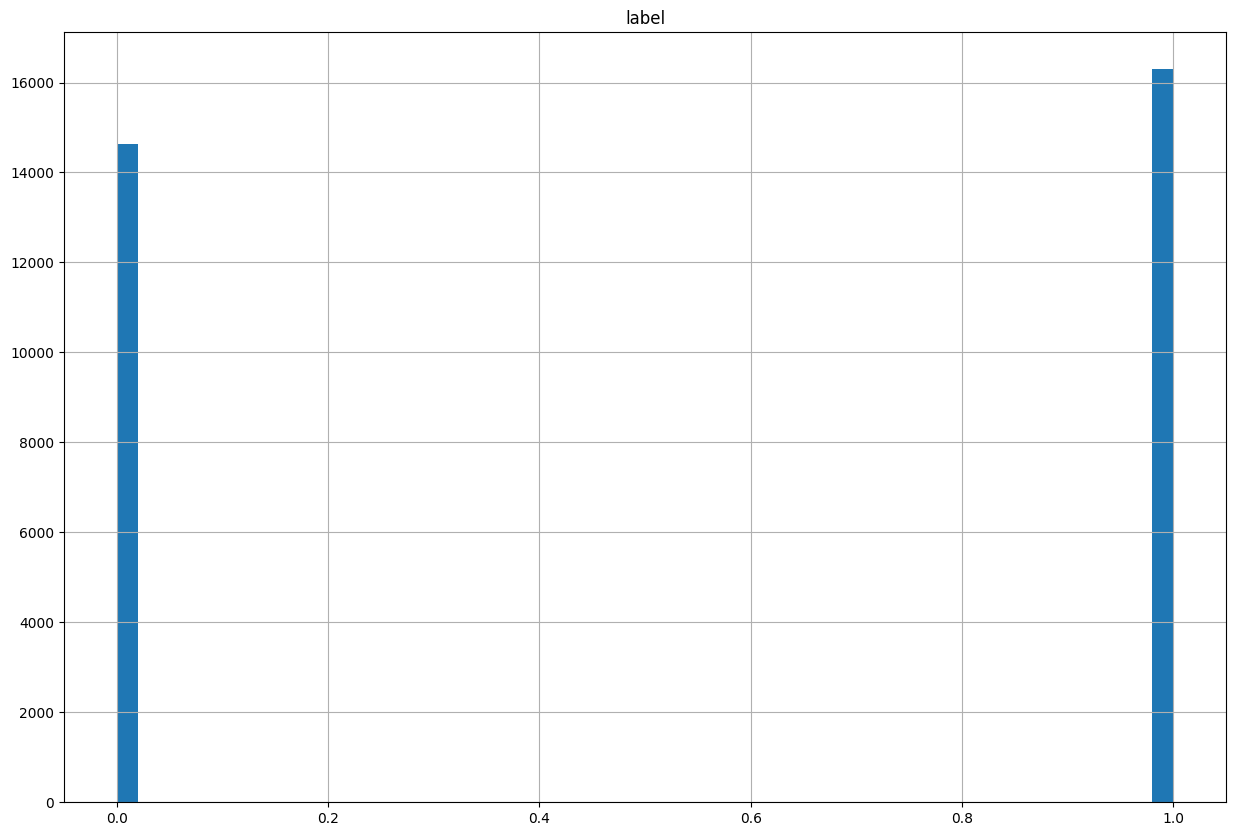

In [19]:
df.hist(bins=50, figsize=(15, 10))
plt.show()

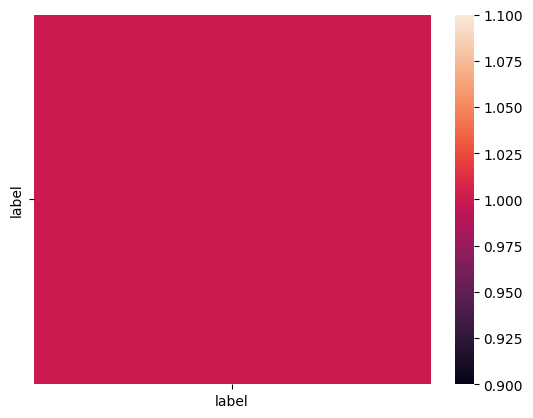

In [24]:
numerical_columns = ['label']

corrmat = df[numerical_columns].corr()
round(corrmat,2)
sns.heatmap(corrmat);

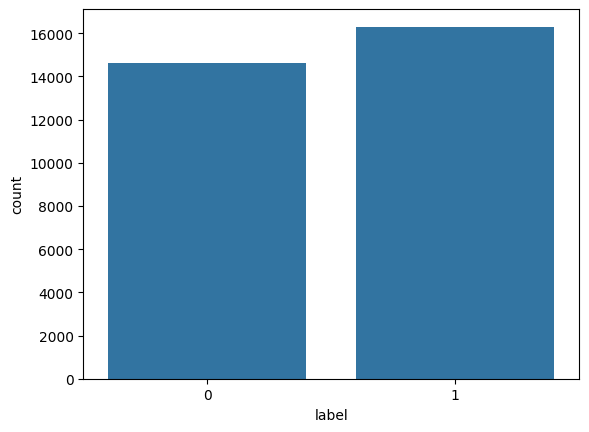

In [34]:
sns.countplot(x='label', data=df)
plt.show()

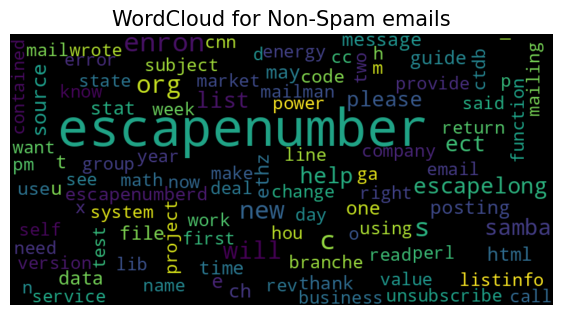

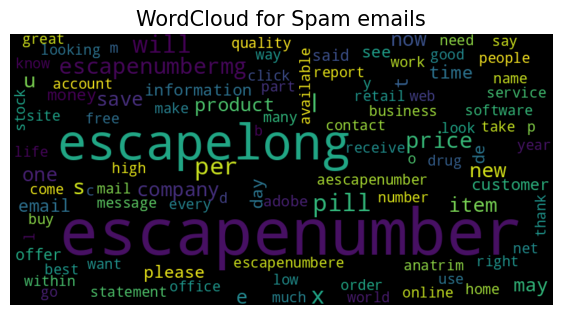

In [38]:
!pip install -q imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
X = df.drop('label', axis=1)
y = df['label']
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['label'])], axis=1)  # Replace 'label' if needed
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['text'])
    plt.figure(figsize=(7, 7))
    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()
plot_word_cloud(balanced_data[balanced_data['label'] == 0], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['label'] == 1], typ='Spam')

In [41]:
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['text'],
                                                    balanced_data['label'],
                                                    test_size = 0.2,
                                                    random_state = 42)

In [50]:

texts = df["text"].astype(str).values
labels = df["label"].values

In [51]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

max_len = 100
train_sequences = pad_sequences(train_sequences,
                                maxlen=max_len,
                                padding='post',
                                truncating='post')
test_sequences = pad_sequences(test_sequences,
                               maxlen=max_len,
                               padding='post',
                               truncating='post')

In [52]:
max_words = 10000
max_length = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post", truncating="post")

In [53]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [54]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_length),
    SimpleRNN(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [56]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 94s 43ms/step - accuracy: 0.8144 - loss: 0.4178 - val_accuracy: 0.8847 - val_loss: 0.3034
Epoch 2/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 153s 49ms/step - accuracy: 0.9249 - loss: 0.2089 - val_accuracy: 0.9558 - val_loss: 0.1561
Epoch 3/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 88s 42ms/step - accuracy: 0.9470 - loss: 0.1517 - val_accuracy: 0.8327 - val_loss: 0.4700
Epoch 4/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 136s 39ms/step - accuracy: 0.8986 - loss: 0.2593 - val_accuracy: 0.7892 - val_loss: 0.4529
Epoch 5/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.9141 - loss: 0.2330 - val_accuracy: 0.8329 - val_loss: 0.3875


In [58]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

522/522 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8287 - loss: 0.3965
Test Accuracy: 0.8329


In [59]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
train_loss, train_acc = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_acc:.4f}")

522/522 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8287 - loss: 0.3965
Test Accuracy: 0.8329
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8433 - loss: 0.3603
Train Accuracy: 0.8447


In [61]:
import numpy as np
num_samples = 10
random_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
random_samples = X_test[random_indices]
random_labels = y_test[random_indices]
predictions = model.predict(random_samples)
predicted_labels = (predictions > 0.5).astype(int).flatten()
for i in range(num_samples):
    print(f"Sample {i+1}:")
    print(f"  True Label: {random_labels[i]}")
    print(f"  Predicted Label: {predicted_labels[i]}")
    print(f"  Predicted Probability: {predictions[i][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Sample 1:
  True Label: 1
  Predicted Label: 1
  Predicted Probability: 0.7118
Sample 2:
  True Label: 1
  Predicted Label: 1
  Predicted Probability: 0.8937
Sample 3:
  True Label: 1
  Predicted Label: 1
  Predicted Probability: 0.8340
Sample 4:
  True Label: 0
  Predicted Label: 0
  Predicted Probability: 0.0299
Sample 5:
  True Label: 1
  Predicted Label: 1
  Predicted Probability: 0.9561
Sample 6:
  True Label: 1
  Predicted Label: 1
  Predicted Probability: 0.7885
Sample 7:
  True Label: 1
  Predicted Label: 1
  Predicted Probability: 0.7686
Sample 8:
  True Label: 1
  Predicted Label: 1
  Predicted Probability: 0.7520
Sample 9:
  True Label: 0
  Predicted Label: 0
  Predicted Probability: 0.0213
Sample 10:
  True Label: 0
  Predicted Label: 0
  Predicted Probability: 0.0281


522/522 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


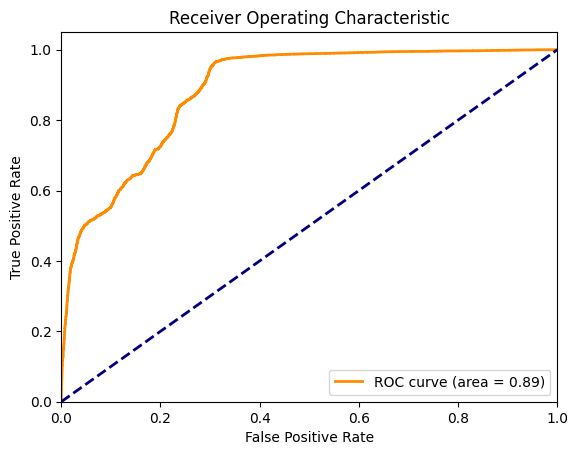

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
